In [1]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Modern Data Science Problems (problems till 20.11)
by *Nora Salone* 

### Problem 1. 

* Tossing a coin three times: H – head, T – tail

* What is the sample space $\Omega$?

What is the event space F for selection of at least two heads?


The sample space is $\Omega$={HHH,HHT,HTH,THH,TTH,THT,HTT,TTT}. The event space for at least two heads is F={HHH,HHT,HTH,THH}.

### Problem 2
Show that:

$$P(B) = \sum_{i} P(B|A_{i}) \cdot P(A_{i})$$

for $A_{i}$ being disjoint sets, partitioning the whole sample space ($\Omega = U A_{i}$ ) and
$P(A_{i})>0$ for all $i$.

If $A_i\cap A_j =\emptyset$ for $i\neq j$ and $\cup A_i = \Omega$ $\Longrightarrow$ $\sum P(A_i)=1$. 

The probability that $B$ happens after $A_i$ occurred is
$$P(B|A_i)=\frac{P(B\cap A_i)}{P(A_i)}$$

Then
$$\sum_i P(B|A_i)\cdot P(A_i)=\sum_i\frac{P(B\cap A_i)}{P(A_i)}\cdot P(A_i)=
\sum_i P(B\cap A_i)= P(B)$$

since the law of total probability states that
$$\sum_i P(B\cap A_i)= P(B)$$

### Problem 7
Derive the optimal algorithm $f^{*}(X)$ assuming $L(f(X), Y) = |(f(X) -Y)|$

fffffggfgfhjhjh

### Problem 8
Derive the optimal algorithm $f^{*}(X)$ assuming $L(f(X), Y) = (f(X) -Y)^{2}$

dfffdg

### Problem 12
Show that:
$$\text{Var}[X] = E[X^{2}] – E^{2}[X].$$

$Var[X]$$=E[(X-E(X))^2]\\
       =E[X^2-2XE[X]+E[X]^2]\\
       =E[X^2]-2E[X]E[X]+E[X]^2\\
       =E[X^2]-E[X]^2$

### Problem 21

Rolling a die Ω = { 1 , 2 , 3 , 4 , 5, 6 }
X is 1 if even number 0 otherwise.
Y is 1 if prime number 0 otherwise.

* Calculate joint PMF

* Calculate marginal PMF of X and of Y

* Calculate conditional PMF pY|X (r|X=1)

* Check if h(k) = pY|X (r|k) is a proper probability function with respect to k

In [31]:
import random

#implement function that if H roll die twice, if T roll once

def roll_die(n):
    min = 1
    max = 6
    for i in range(n):
        roll=random.randint(min, max)
    return roll

def assign_prob(flips): #this returns data list after some flips
    data=[]
    for i in range(flips):
        die=roll_die(1)
        if (die % 2)==0: #which is even
            xval=1 
        else:
            xval=0        
        if die > 2:
            for i in range(2, die):
                if (die % i) == 0: #i.e. not a prime number
                    yval=0
                    nbreak=1
                    break
                else:
                    yval=1 #even if die has modulus !=0 for some i's, set yval=1; if there is even one i with modulus ==0, overwrite yval=1
        else:
            if die==1:
                yval=0 #die=1 is not prime
            elif die==2:
                yval=1 #die 2 is prime
        data.append([die,xval,yval])#1 for even, 0 for odd
    print("[Number of die, x value, y value]")
    return data

flips=10
#data=assign_prob(flips)
data=[[1,0,0],[2,1,1],[3,0,1],[4,1,0],[5,0,1],[6,1,0]]
print(data)

def joint_PMF(data):
    pmfE=np.array([0]*3) #even number
    pmfP=np.array([0]*3) #prime number
    for i in range(len(data)):
        #print("i=",i,"data[i][0]=",data[i][0],"data[i][1]=",data[i][1],"data[i][2]=",data[i][2])
        if data[i][1]==1:  #outcome: even 
            if data[i][0]==2:
                pmfE[0] += 1
            elif data[i][0]==4:
                pmfE[1] += 1
            elif data[i][0]==6:
                pmfE[2] += 1
        if data[i][2]==1:  #outcome: prime
            if data[i][0]==2:
                pmfP[0] += 1
            elif data[i][0]==3:
                pmfP[1] += 1
            elif data[i][0]==5:
                pmfP[2] += 1
    print("pmfE=",pmfE)
    print("pmfP=",pmfP)
    pmfE=pmfE/6 #6 possible die outcomes in both cases
    pmfP=pmfP/6 
    return [pmfE,pmfP]

joint_PMF(data)


[[1, 0, 0], [2, 1, 1], [3, 0, 1], [4, 1, 0], [5, 0, 1], [6, 1, 0]]
pmfE= [1 1 1]
pmfP= [1 1 1]


[array([0.16666667, 0.16666667, 0.16666667]),
 array([0.16666667, 0.16666667, 0.16666667])]

In [25]:
Dane=np.array([["",'0','1','0','1','0','1'],["",'0','1','1','0','1','0']])
 
Dane_display= pd.DataFrame(Dane,columns=['die =','1','2','3','4','5','6'],index=['X','Y'])
display(Dane_display)

,die =,1,2,3,4,5,6
X,,0,1,0,1,0,1
Y,,0,1,1,0,1,0


The joint probability mass function PMF of $X$ and $Y$ defines probabilities for each pair of outcomes. All possible outcomes are

$$p_{XY}(0,0)=1/6\\
p_{XY}(0,1)=2/6=1/3\\
p_{XY}(1,0)=2/6=1/3\\
p_{XY}(1,1)=1/6$$


The marginal probability distribution of the random variable $X$ is the sum of the joint PMF values over the values of r:

$$p_X(k)=\sum_r p_{XY}(k,r)$$

whereas for $Y$ one sums over $k$

$$p_Y(k)=\sum_k p_{XY}(k,r)$$

In this case:
$$p_X(0)=\sum_r p_{XY}(0,r)= p_{XY}(0,0) + p_{XY}(0,1) = \frac{1}{6}+\frac{2}{6}=\frac{1}{2}\\
p_X(1)=\sum_r p_{XY}(1,r)= p_{XY}(1,0) + p_{XY}(1,1) = \frac{2}{6}+\frac{1}{6}=\frac{1}{2}$$

which is compatible with 

$$\sum_k p_X(k)=1$$

The same goes for $p_Y(r)$:

$$p_Y(0)=\sum_k p_{XY}(k,0)= p_{XY}(0,0) + p_{XY}(1,0) = \frac{1}{6}+\frac{2}{6}=\frac{1}{2}\\
p_Y(1)=\sum_k p_{XY}(k,1)= p_{XY}(0,1) + p_{XY}(1,1) = \frac{2}{6}+\frac{1}{6}=\frac{1}{2}$$

which is compatible with 

$$\sum_r p_Y(r)=1$$.

The conditional PMF is 
$$p_{Y|X}[r|1]=\frac{p_{XY}(1,r)}{p_X(1)}$$
which in this case means

In [2]:
Dane=np.array([["",'1','0','0'],["",'1/3','2/3','2/3']])
 
Dane_display= pd.DataFrame(Dane,columns=['die =','2','4','6'],index=['Y=r','$$p_{Y|X}[r|1]$$'])
display(Dane_display)

,die =,2,4,6
Y=r,,1,0,0
$$p_{Y|X}[r|1]$$,,1/3,2/3,2/3


$h(x)=p_{Y|X}[r|k]$ is a proper probability function if
$$\sum_k p_{Y|X}(r|k)=1$$ for all $k$. We have

$$\sum_k p_{Y|X}[r|k]=p_{Y|X}[r|0]+p_{Y|X}[r|1]=\frac{p_{XY}(0,r)}{p_X(0)}+\frac{p_{XY}(1,r)}{p_X(1)}$$

We have the above-mentioned case $X=1$, where $\sum_r p_{Y|X}(r|k)=1/3+2/3=1$, and the $X=0$ case, where $\sum_r p_{Y|X}(r|1)=1/3+2/3=1$, so $p_{Y|X}(r|0)$ is a proper probability function.

### Problem 22

 Let X and Y have a joint PDF fXY (x,y) = x+y for 0 <x<1, 0<y<1
 
* Find conditional PDF fY|X (y|x)

* Show that the integral of fY|X (y|x) over all y values is equal to 1

The conditional PDF is
$$f_{Y|X}(y|x)=\frac{f_{XY}(x,y)}{f_X(x)}$$
with joint PDF $f_{XY}(x,y)$.

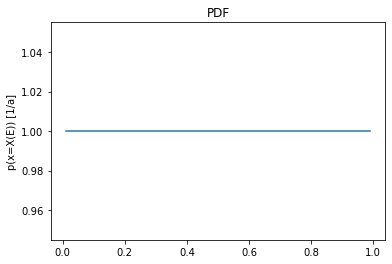

In [12]:
from scipy.stats import uniform
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100) 

plt.plot(x, uniform.pdf(x))
plt.ylabel('p(x=X(E)) [1/a]')
plt.title('PDF')
plt.show()

### Problem 23

Show that:

* Cov[X,Y] = E[XY] – E[X]E[Y]

* Var[X+Y] = Var[X] + Var[Y] + 2 Cov[X,Y]

$Cov(X,Y)$$=E[(X-E[X])(Y-E[Y])]\\
         =E[XY-XE[Y]-E[X]Y+E[X]E[Y]\\
         =E[XY]-E[X]E[Y]-E[X]E[Y]+E[X]E[Y]\\
         =E[XY]-E[X]E[Y]$

$Var(X+Y)$$=E[(X+Y)^2]-E[X+Y]^2\\
          =E[X^2]+2E[XY]+E[Y^2]-(E[X]+E[Y])^2\\
          =E[X^2]+2E[XY]+E[Y^2]-E[X]^2-2E[X]E[Y]-E[Y]^2\\
          =Var[X]+Var[Y]+2E[XY]-2E[X]E[Y]\\
          =Var[X]+Var[Y]+2Cov(X,Y)$

### Problem 25

Rolling a die Ω = { 1 , 2 , 3 , 4 , 5, 6 }

X is 1 if even number 0 otherwise.

Y is 1 if prime number 0 otherwise.

* Calculate E[Y|1], E[Y|0]

* Var[Y|1], Var[Y|0]

$$E[Y|1]=\sum_r r\cdot p_{Y|X}[r|1]=0\cdot p_{Y|X}[0|1]+p_{Y|X}[1|1]=1/3$$

$$E[Y|0]=\sum_r r\cdot p_{Y|X}[r|0]=p_{Y|X}[1|0]=2/3$$

$$Var[Y|1]=\sum_r (r-E[Y|1])^2 p_{Y|X}[r|1]=E[Y|1]^2 p_{Y|X}[0|1]+(1-E[Y|1])^2 p_{Y|X}[1|1]=\\
=\frac{1}{9}\frac{2}{3}+\frac{4}{9}\frac{1}{3}=\frac{2}{9}$$

$$Var[Y|0]=\sum_r (r-E[Y|0])^2 p_{Y|X}[r|0]=E[Y|0]^2 p_{Y|X}[0|0]+(1-E[Y|0])^2 p_{Y|X}[0|1]=\\
=\frac{4}{9}\frac{1}{3}+\frac{1}{9}\frac{2}{3}=\frac{2}{9}$$